In [2]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [4]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

In [5]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

array([[<AxesSubplot: title={'center': 'Total day minutes'}>,
        <AxesSubplot: title={'center': 'Total intl calls'}>]],
      dtype=object)

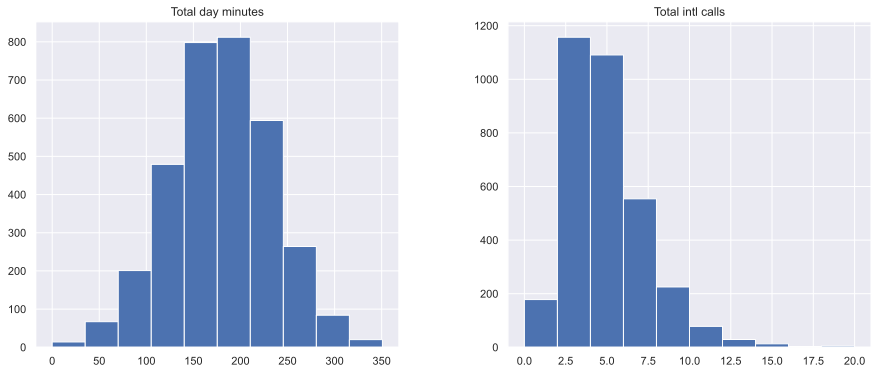

In [6]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize = (15, 6))

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

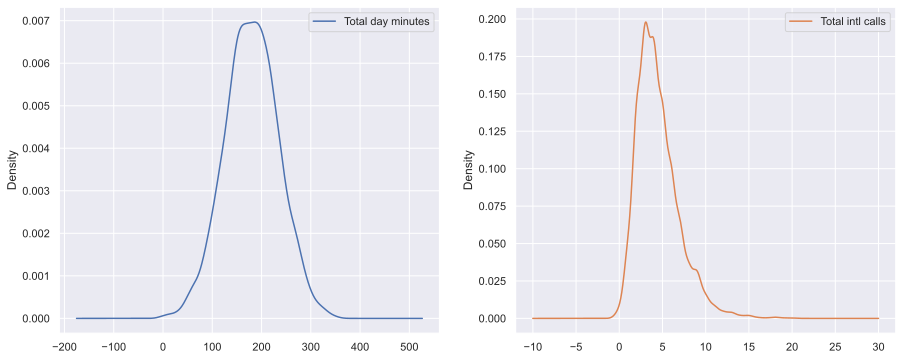

In [7]:
df[features].plot(kind='density', subplots=1, figsize=(15, 6), layout=(1, 2), sharex=0)

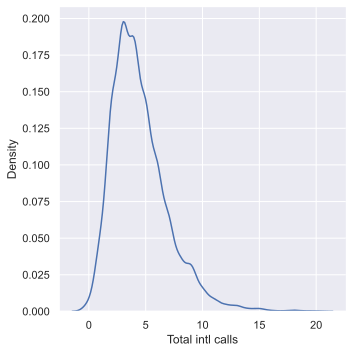

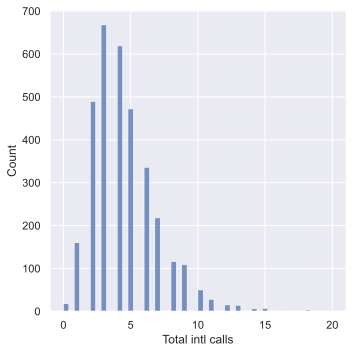

In [8]:
sns.displot(df["Total intl calls"], kind="kde")
sns.displot(df["Total intl calls"], kind="hist")

/Users/vladimirberman/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot: xlabel='Total intl calls', ylabel='Density'>

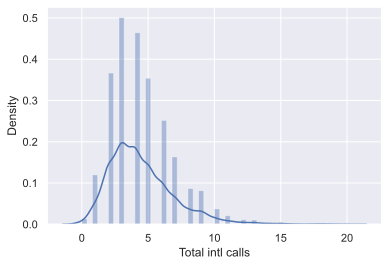

In [9]:
sns.distplot(df["Total intl calls"])

/Users/vladimirberman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='Total intl calls'>

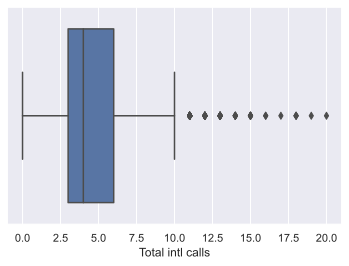

In [10]:
sns.boxplot(df["Total intl calls"])

<AxesSubplot: xlabel='Total intl calls'>

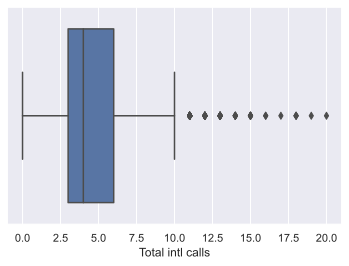

In [11]:
sns.boxplot(x = "Total intl calls", data = df)

<AxesSubplot: >

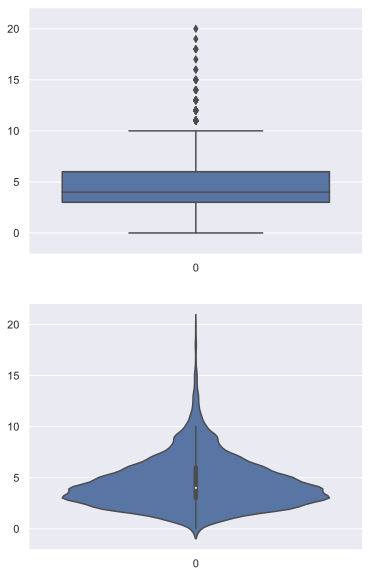

In [12]:
_, axes = plt.subplots(2, 1, sharey = True, figsize = (6, 10))
sns.boxplot(data = df["Total intl calls"], ax=axes[0])
sns.violinplot(data = df["Total intl calls"], ax=axes[1])

In [13]:
df[features].describe(percentiles=[0.25, 0.7, 0.8],)

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
70%           208.740000          5.000000
80%           224.760000          6.000000
max           350.800000         20.000000

In [14]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

<AxesSubplot: >

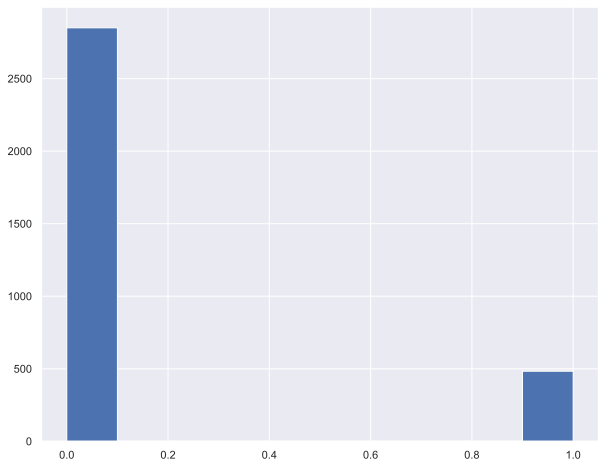

In [15]:
df["Churn"].astype('int').hist(figsize=(10, 8))

<AxesSubplot: xlabel='Customer service calls', ylabel='count'>

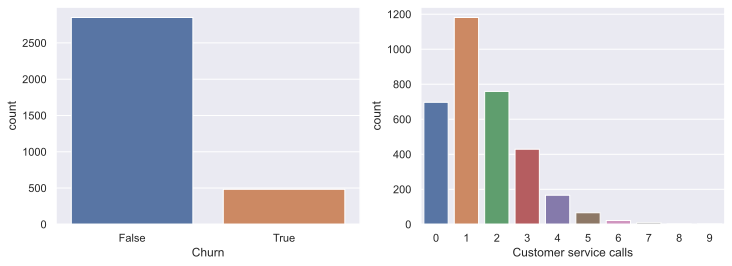

In [16]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize = (12, 4))

sns.countplot(x = 'Churn', data = df, ax = axes[0])
sns.countplot(x = 'Customer service calls', data = df, ax = axes[1])

<AxesSubplot: >

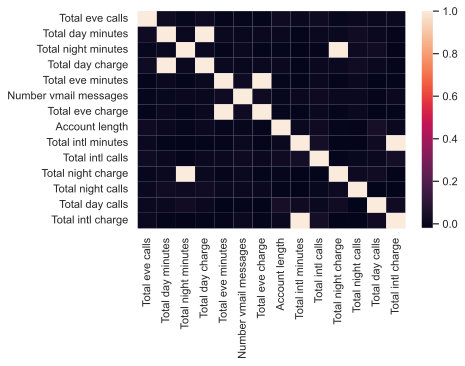

In [17]:
numerical = list(set(df.select_dtypes(include = np.number)) - set([
            "Area code",
            "Customer service calls",
        ]))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

<AxesSubplot: >

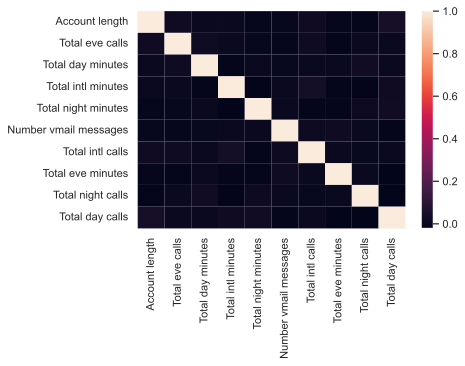

In [18]:
numerical = list(set(numerical) - set(["Total day charge", "Total eve charge", "Total night charge", "Total intl charge"]))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

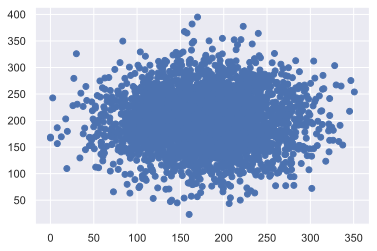

In [19]:
plt.scatter(df["Total day minutes"], df["Total night minutes"])

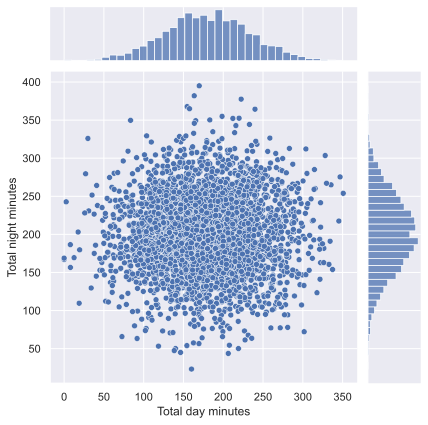

In [20]:
sns.jointplot(x = "Total day minutes", y = "Total night minutes", data = df, kind = 'scatter')

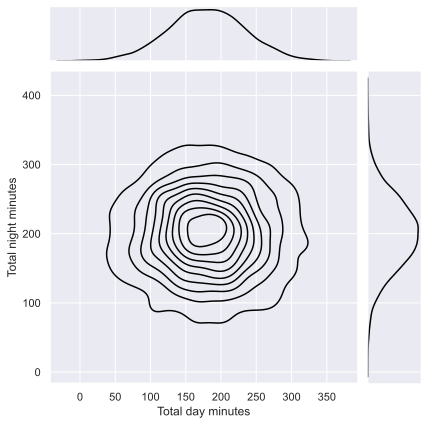

In [21]:
sns.jointplot(x = "Total day minutes", y = "Total night minutes", data = df, kind = 'kde', color = 'black')

In [22]:
%config InlineBackend.figure_format = 'png'

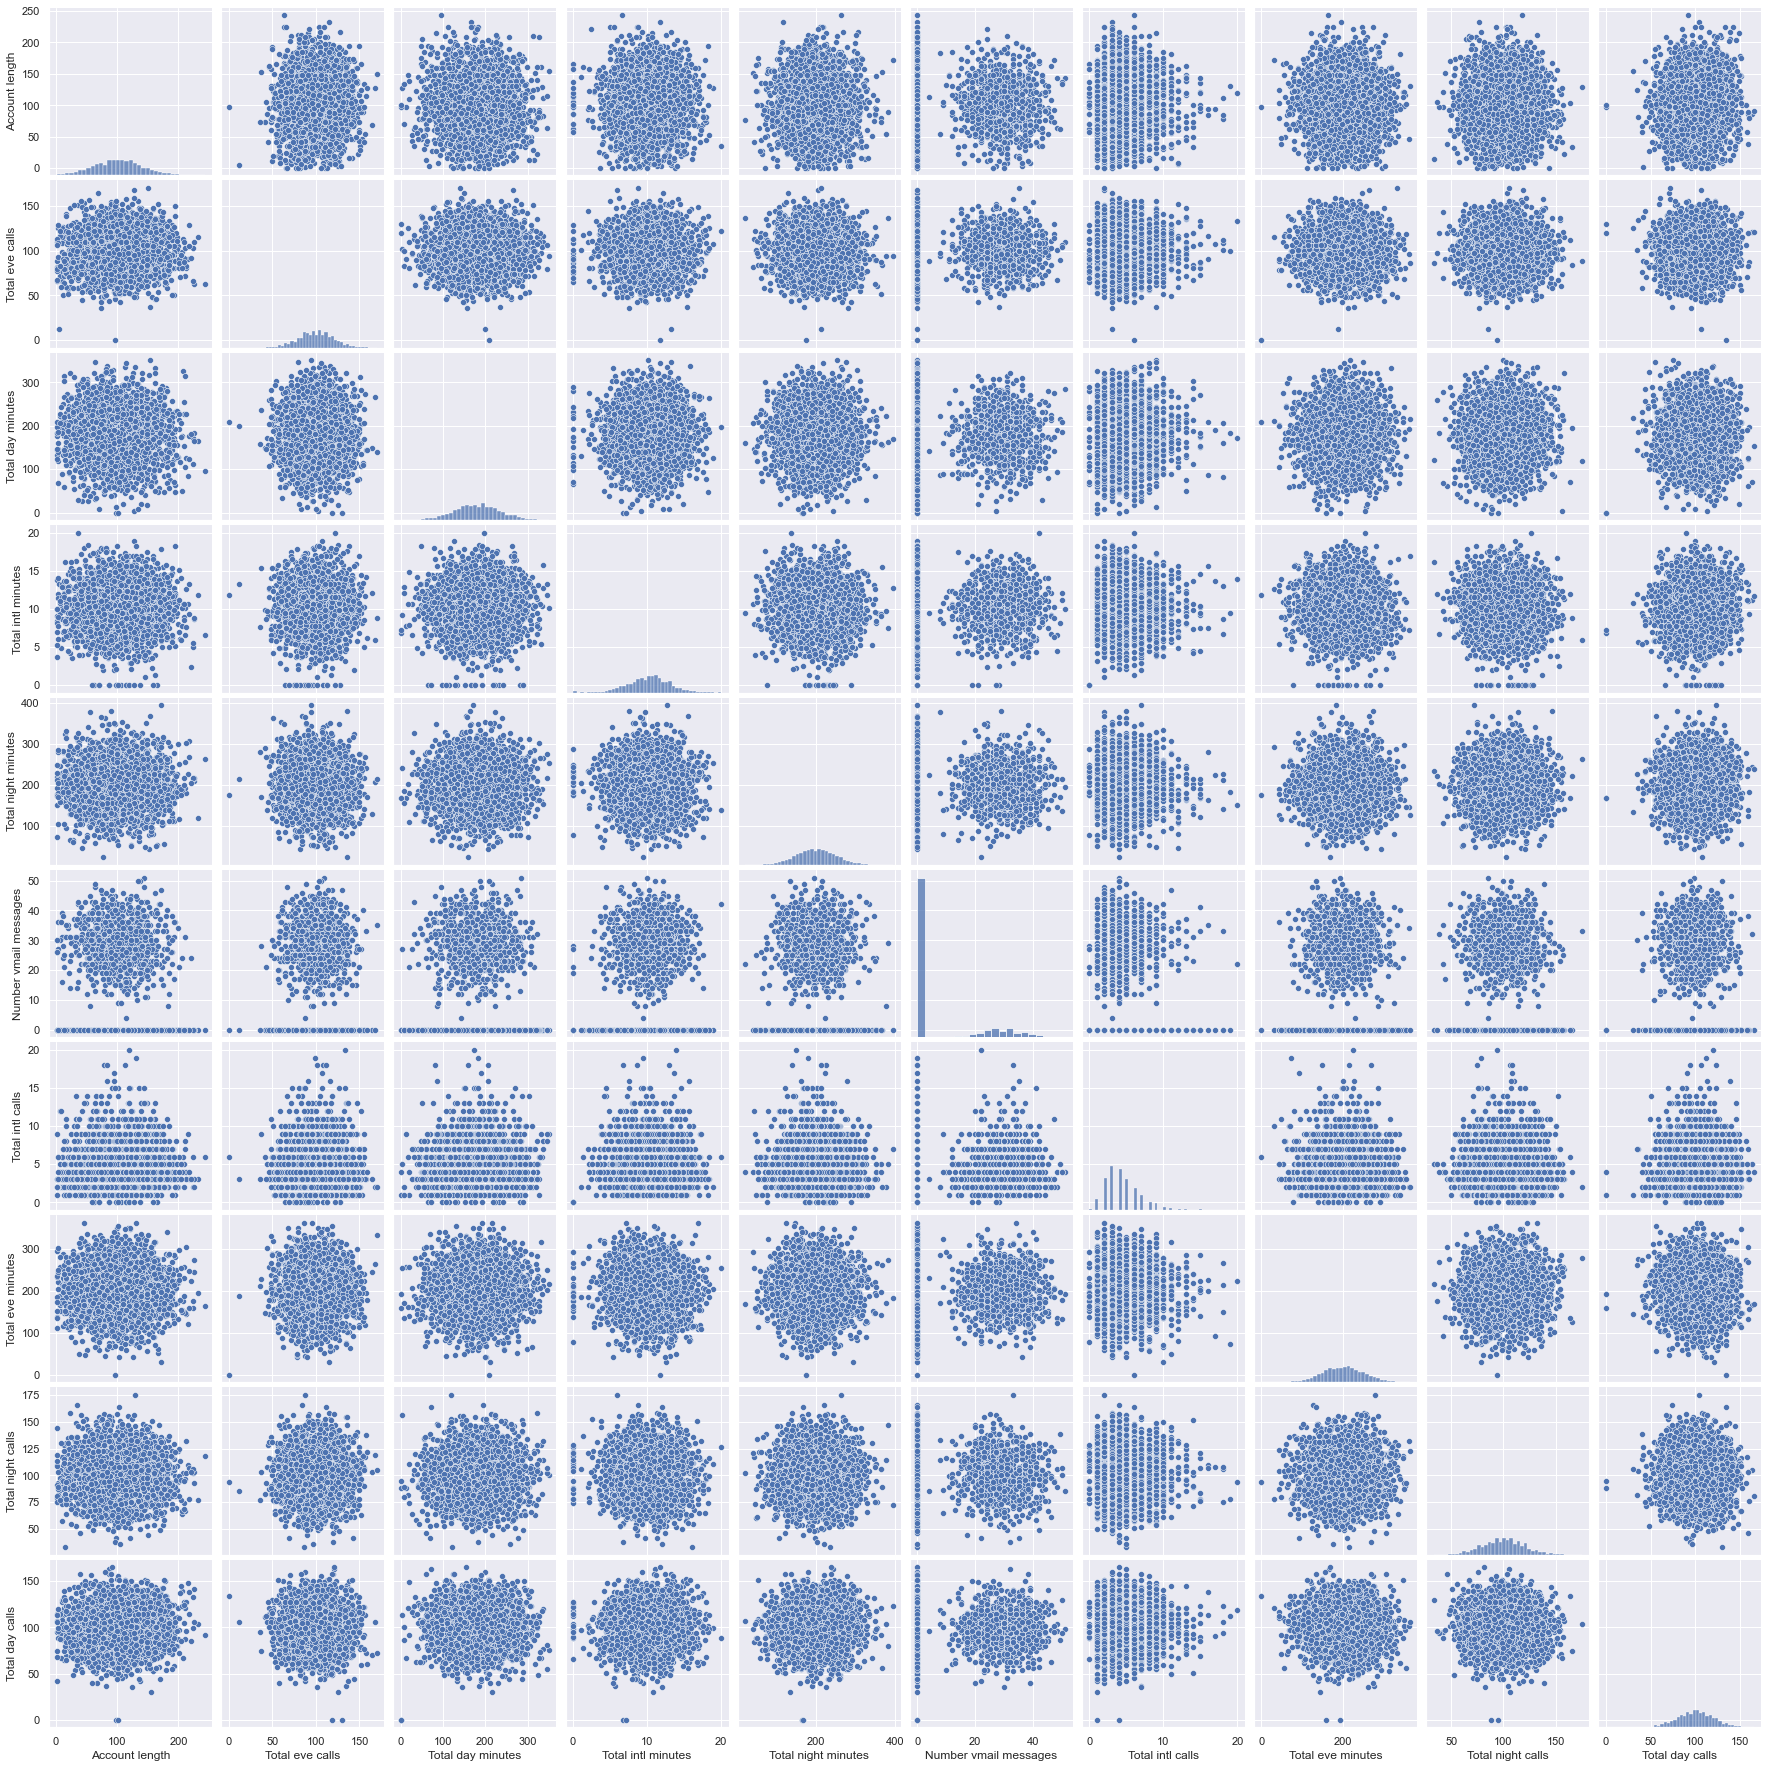

In [23]:
sns.pairplot(df[numerical])

In [24]:
%config InlineBackend.figure_format = 'svg'

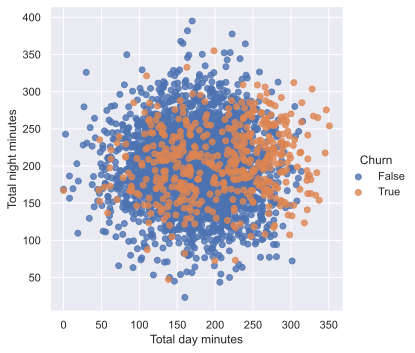

In [25]:
sns.lmplot(x = 'Total day minutes', y = 'Total night minutes', hue = 'Churn', data = df, fit_reg=False)

In [26]:
numerical.append('Customer service calls')

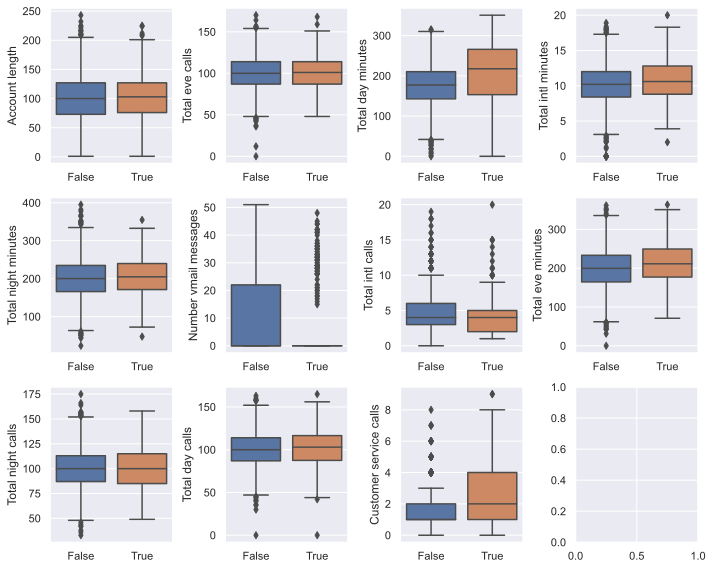

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 8))
for i, feat in enumerate(numerical):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x = 'Churn', y = feat, data = df, ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
plt.tight_layout()

<AxesSubplot: xlabel='Churn', ylabel='Total day minutes'>

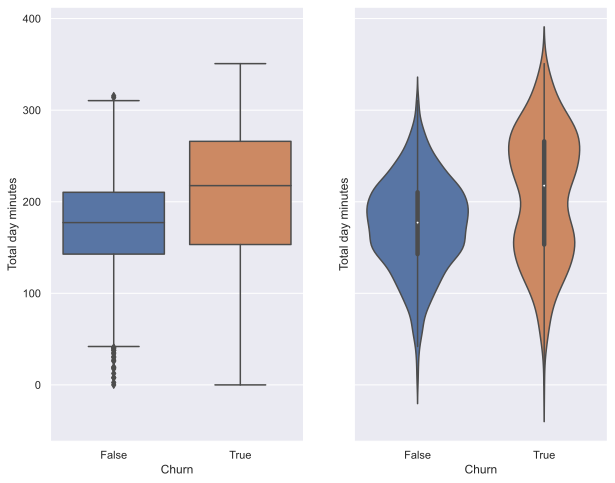

In [28]:
_, axes = plt.subplots(1, 2, sharey=True, figsize = (10, 8))
sns.boxplot(x = 'Churn', y = 'Total day minutes', data = df, ax = axes[0])
sns.violinplot(x = df['Churn'], y = df['Total day minutes'], ax = axes[1])

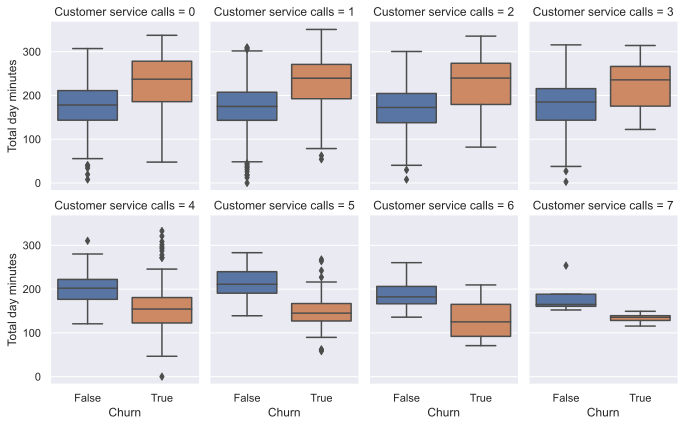

In [29]:
sns.catplot(x = 'Churn', y = 'Total day minutes', col = 'Customer service calls', data = df[df['Customer service calls'] < 8], kind='box', col_wrap=4, height=3, aspect=0.8)

<AxesSubplot: xlabel='Customer service calls', ylabel='count'>

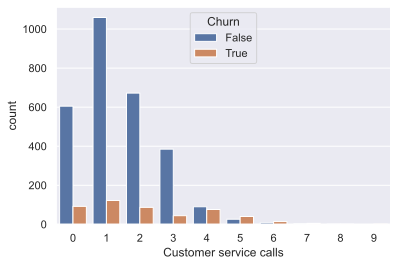

In [30]:
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = df)

<AxesSubplot: xlabel='International plan', ylabel='count'>

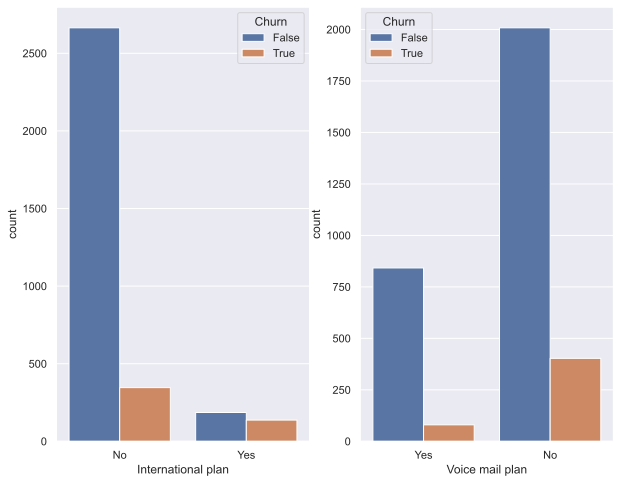

In [31]:
_, ax = plt.subplots(1, 2, figsize = (10, 8))
sns.countplot(x = df['Voice mail plan'], hue = df['Churn'], ax = ax[1])
sns.countplot(x = 'International plan', hue = 'Churn', data = df, ax = ax[0])

In [32]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [33]:
df.groupby('State')['Churn'].agg([np.mean]).sort_values(by = 'mean', ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [34]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [35]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes':1, 'No':0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes':1, 'No':0})

In [36]:
X.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

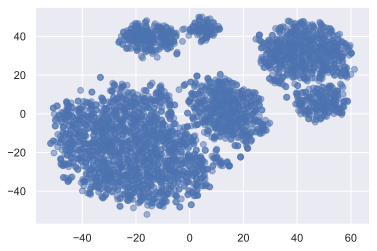

In [38]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5)

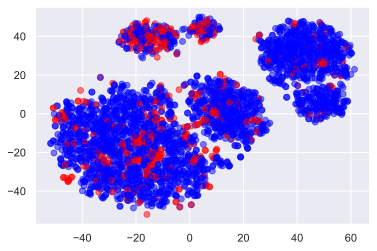

In [39]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c = df['Churn'].map({False:'blue', True:'red'}), alpha=0.5)

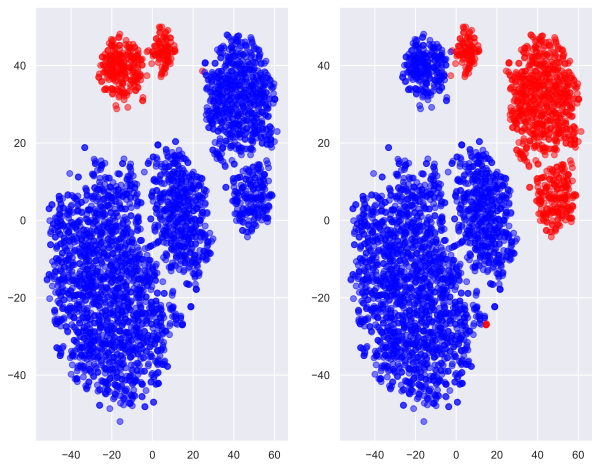

In [40]:
_, ax = plt.subplots(1, 2, figsize = (10, 8))
for i, name in enumerate(['International plan', 'Voice mail plan']):
    ax[i].scatter(x = tsne_repr[:, 0], y = tsne_repr[:, 1], c = df[name].map({'Yes' : 'red', 'No' : 'blue'}), alpha = 0.5)

In [41]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size and set the color scheme
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

In [42]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_URL + 'video_games_sales.csv')

In [43]:
print(df.shape)

(16719, 16)


In [44]:
df = df.dropna()
print(df.shape)

(6825, 16)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [46]:
df.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

In [47]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')

In [48]:
int_types = ['Year_of_Release', 'Critic_Count', 'User_Count']
df[int_types] = df[int_types].astype('int64')
df['User_Score'] = df['User_Score'].astype('float64')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int64  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   int64  
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   int64  
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB


In [50]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'Rating']
df[useful_cols].head()

Name Platform  Year_of_Release     Genre  Global_Sales  \
0             Wii Sports      Wii             2006    Sports         82.53   
2         Mario Kart Wii      Wii             2008    Racing         35.52   
3      Wii Sports Resort      Wii             2009    Sports         32.77   
6  New Super Mario Bros.       DS             2006  Platform         29.80   
7               Wii Play      Wii             2006      Misc         28.92   

   Critic_Score  Critic_Count  User_Score Rating  
0          76.0            51         8.0      E  
2          82.0            73         8.3      E  
3          80.0            73         8.0      E  
6          89.0            65         8.5      E  
7          58.0            41         6.6      E

<AxesSubplot: xlabel='Year_of_Release'>

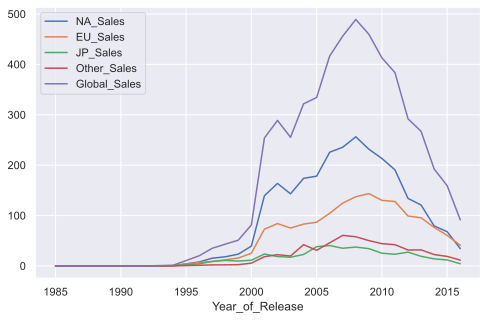

In [51]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot()

<AxesSubplot: xlabel='Year_of_Release'>

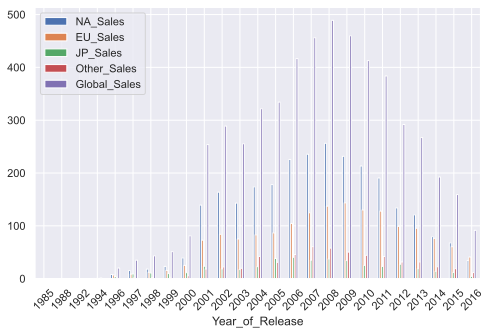

In [52]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

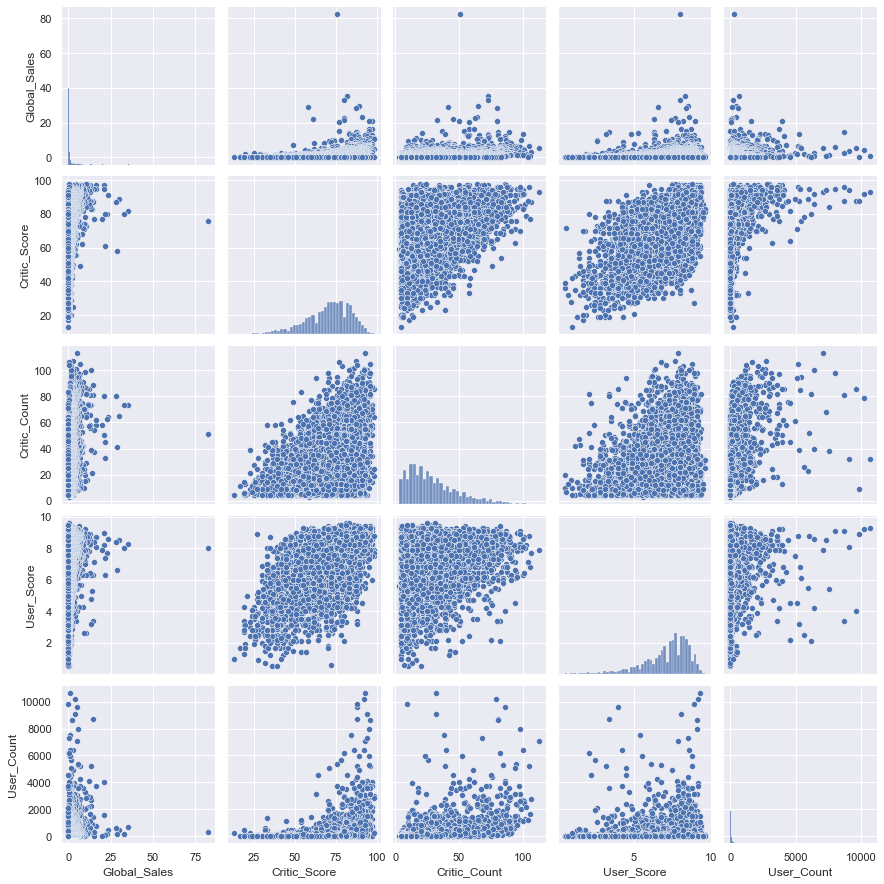

In [53]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']])

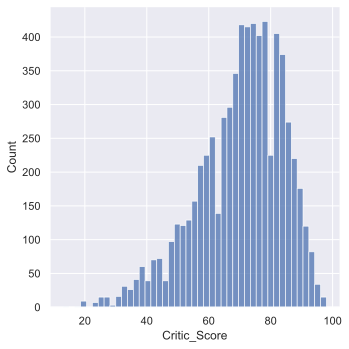

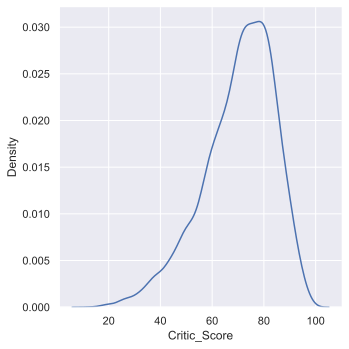

In [54]:
%config InlineBackend.figure_format = 'svg'
sns.displot(df['Critic_Score'])
sns.displot(df['Critic_Score'], kind='kde')

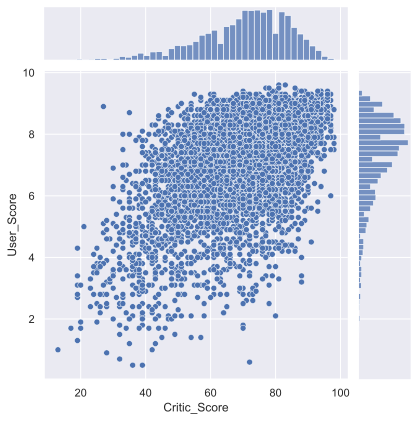

In [55]:
sns.jointplot(x = 'Critic_Score', y = 'User_Score', data = df)

In [56]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False)[0:5].index.values

<AxesSubplot: xlabel='Critic_Score', ylabel='Platform'>

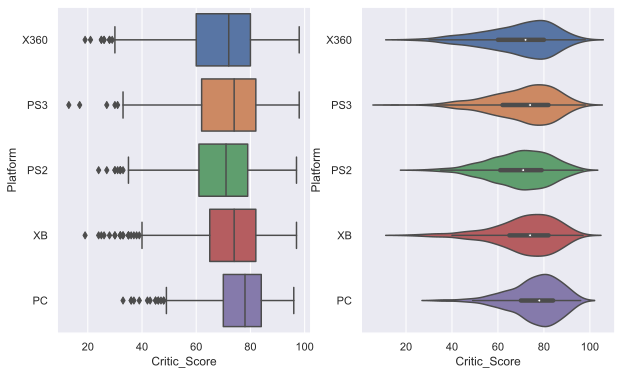

In [57]:
_, ax = plt.subplots(1, 2, figsize = (10, 6))
sns.boxplot(x = 'Critic_Score', y = 'Platform', data = df[df['Platform'].isin(top_platforms)], ax = ax[0])
sns.violinplot(x = 'Critic_Score', y = 'Platform', data = df[df['Platform'].isin(top_platforms)], ax = ax[1])

In [58]:
platfort_genre_sales = df.pivot_table(index = 'Platform', columns = 'Genre', values = 'Global_Sales', aggfunc=sum).fillna(0).applymap(float)

<AxesSubplot: xlabel='Genre', ylabel='Platform'>

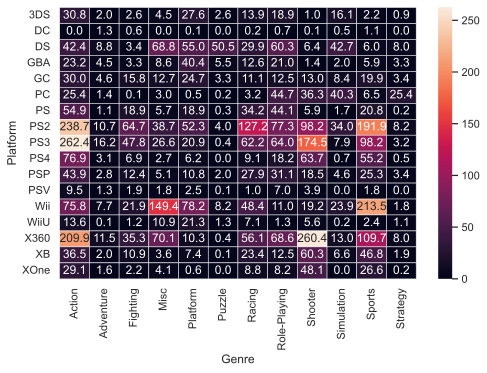

In [59]:
sns.heatmap(platfort_genre_sales, annot=True, fmt='.1f', linewidths=.5)

In [60]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from IPython.display import display, IFrame

In [61]:
init_notebook_mode(True)
def plotly_depict_figure_as_iframe(fig, title = "", width = 800, height = 500, plot_path='../../_static/plotly_htmls/'):
    """
    This is a helper method to visualizae PLotly plots as Iframes in a Jupyter book.
    If you are running `jupyter-notebook`, you can just use iplot(fig).
    """

    # in a Jupyter Notebook, the following should work
    #iplot(fig, show_link=False)

    # in a Jupyter Book, we save a plot offline and then render it with IFrame
    fig_path_path = f"{plot_path}/{title}.html"
    plot(fig, filename=fig_path_path, show_link=False, auto_open=False);
    display(IFrame(fig_path_path, width=width, height=height))


In [66]:
years_df = df.groupby("Year_of_Release")[["Global_Sales"]].sum().join(df.groupby("Year_of_Release")[["Name"]].count())
years_df.columns = ["Global_Sales", "Number_of_Games"]
years_df.head()

Global_Sales  Number_of_Games
Year_of_Release                               
1985                     0.03                1
1988                     0.03                1
1992                     0.03                1
1994                     1.27                1
1996                    20.10                7

In [67]:
trace0 = go.Scatter(x = years_df.index, y = years_df["Global_Sales"], name = "Global Sales")
trace1 = go.Scatter(x = years_df.index, y = years_df["Number_of_Games"], name = "Number of games released")
data = [trace0, trace1]
layout = {"title" : "Statistics for video games"}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [68]:
plotly.offline.plot(fig, filename = "years_stats.html", show_link=False, auto_open=True)

'years_stats.html'

In [70]:
platforms_df = df.groupby("Platform")[["Global_Sales"]].sum().join(df.groupby("Platform")[["Name"]].count())
platforms_df.columns = ["Global_Sales", "Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending = False, inplace = True)

In [71]:
trace0 = go.Bar(x = platforms_df.index, y = platforms_df["Global_Sales"], name = "Global Sales")
trace1 = go.Bar(x = platforms_df.index, y = platforms_df["Number_of_Games"], name = "Number of games released")
data = [trace0, trace1]
layout = {"title" : "Market share by gaming platform"}
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link=False)

In [72]:
data = []
for genre in df.Genre.unique():
    data.append(go.Box(y = df[df.Genre == genre].Critic_Score, name = genre))
iplot(data, show_link=False)